#  Import Packages

In [1]:
from tvips_converter.converting_data.converting_tvips_hdf5_to_nc_file import hdf_to_nc_converter
from tvips_converter.ploting_data.plot_com_shift import plot_com_shift
from tvips_converter.ploting_data.plot_4d_data_wo_saving_no_timestamps import plot_4d_data_wo_saving_no_timestamps
from tvips_converter.converting_data.make_4d_data import make_4d_dataset
from tvips_converter.ploting_data.make_virtuel_df import make_virtual_df
import h5py
import numpy as np
# for marc3 use widget, for your personal pc use notebook
%matplotlib ipympl 

# Set file path 

In [2]:
# Your input required:
filepath = "/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe"
# filename = 'InSe_32x64x300000us'  #hint: name without _data_000001
# filename = 'InSe_C_K_edge_32x32x400000us'  #C-K_Edge data
filename = 'InSe_O_K_edge_32x32x400000us'  #C-K_Edge data

# fp = "/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/"
# SPOT1 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm011_SPOT1.tif", signal_type = 'EELS')

# Do not change
filename_converted= filename+'_converted'
filename_converted

'InSe_O_K_edge_32x32x400000us_converted'

In [4]:
import h5py 
data = h5py.File(filepath+'/'+filename+'_master.h5','r')
print('x scan dimension')
print(np.asarray(data['entry/instrument/tvips/x_scan_dim']))
print('y scan dimension')
print(np.asarray(data['entry/instrument/tvips/y_scan_dim']))
data.close()

x scan dimension
33
y scan dimension
36


# Convert from .tvips to .nc data

In [7]:
# Your input required:

scan_size = (33,31) # (Points, Lines) 
scan_step_size = 1 # nm 
scan_rotation = 0 # degree
# ped_angle= 0. # degree
#dwell_time = 16 # ms
number_of_packages = 1000
convert_diff_data = True
swap_axes = False 


# Do not change

#file = h5py.File(filepath+'/'+filename+'_master.h5','r')
#scan_size = np.copy(np.asarray((np.asarray(file['entry/instrument/tvips/x_scan_dim']),np.asarray(file['entry/instrument/tvips/y_scan_dim']))))
#file.close()

tvips_converter = hdf_to_nc_converter()

tvips_converter.filepath = filepath
tvips_converter.filename = filename
tvips_converter.scan_size = scan_size
tvips_converter.scan_step_size = scan_step_size
tvips_converter.scan_rotation = scan_rotation
# tvips_converter.ped_angle = ped_angle
#tvips_converter.dwell_time = dwell_time
tvips_converter.n_packages = number_of_packages
tvips_converter.convert_diff_data = convert_diff_data
tvips_converter.swap_axes = swap_axes
tvips_converter.convert_to_nc_file()

Package 1 of 2
Package 2 of 2
finished_loading


# Plot com shift 

- skip after bondaries are determined, data can not be converted otherwise

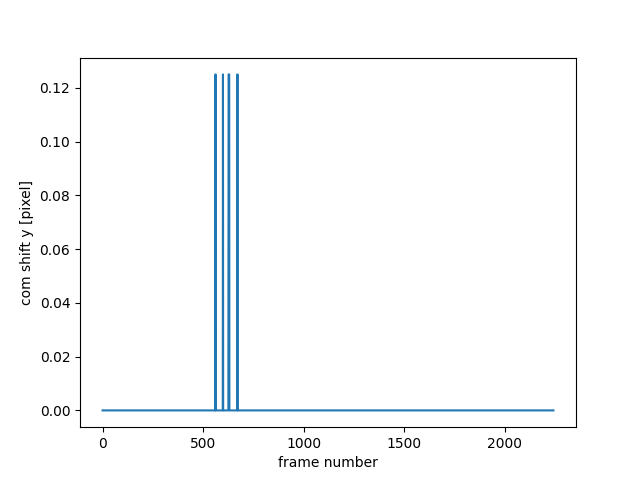

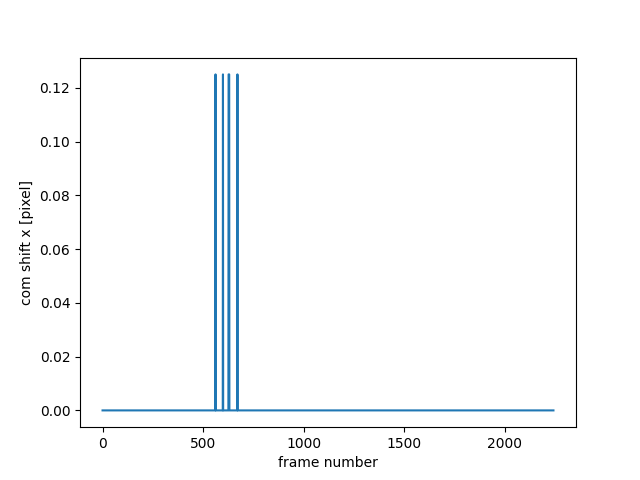

Dataset does not have any timestamps


In [5]:
# Do not change
com_shift_plot = plot_com_shift()
com_shift_plot.filepath = filepath
com_shift_plot.filename = filename_converted
com_shift_plot.plot()

In [49]:
scan_size[0]*scan_size[1]

2244

In [11]:
if True:
    import h5py 
    data = h5py.File(filepath+'/'+filename_converted+'.nc','r+')
    print(data['scan_parameters/scan_size'][:])
    data['scan_parameters/scan_size'][:] = np.asarray((4,4))
    data.close()

[4. 4.]


# Plot first drafts of vdf 

In [21]:
scan_size[0]*scan_size[1]

2145

In [15]:
scan_size[0]

33

In [35]:
# This only produces several vdf images for fine tuning start and end frame. 
# There will be no 4D-Dataset saved in the nc file!

# Your input required:

start = 31 # frame number
# stop = 2132#17010 # frame number
# stop = 2400#17010 # frame number

# start = 0 # frame number
stop = scan_size[0]*scan_size[1]+scan_size[1]+1 #17010 # frame number
# stop = 2244+50
# stop = 1200#17010 # frame number
parts_per_package = 1000 # only if your data is to large reduce it

# Do not change
first_vdf_draft = plot_4d_data_wo_saving_no_timestamps()
first_vdf_draft.filepath = filepath
first_vdf_draft.filename = filename_converted
first_vdf_draft.start = start 
first_vdf_draft.stop = stop
first_vdf_draft.parts_per_package = parts_per_package
first_vdf_draft.estimate_skipped_frame()

Skip every 1024th frame


Map frames in a 4d dataset
Package 1 of 2
Package 2 of 2


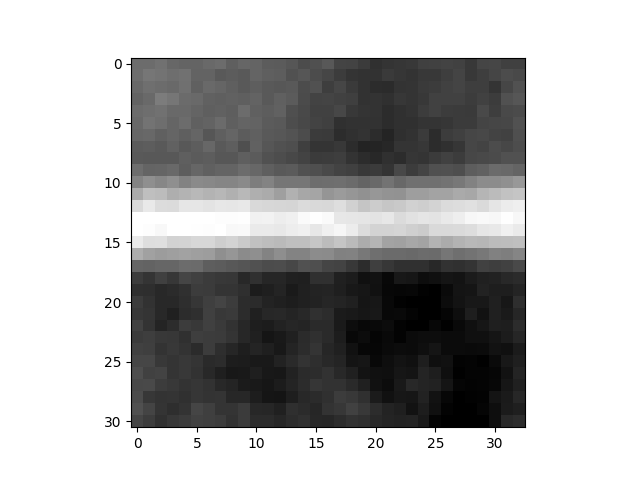

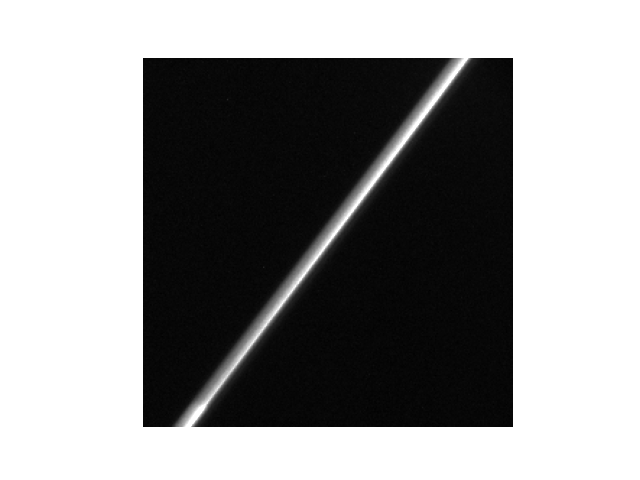

Finished


In [36]:
first_vdf_draft.skip_every_n_frame = 1024
first_vdf_draft.plot()

# Make final 4d dataset

1024
Map frames in 4d
Package 0 of 0
(1022, 256, 256)
(1022, 1)
[  88.89334638 -110.81311155]
[[ 0.10665362 -0.18688845]
 [ 0.10665362 -0.18688845]
 [ 0.10665362 -0.18688845]
 [ 0.10665362 -0.18688845]
 [ 0.10665362 -0.18688845]
 [ 0.10665362 -0.18688845]
 [ 0.10665362 -0.18688845]
 [ 0.10665362 -0.18688845]
 [ 0.10665362 -0.18688845]
 [ 0.10665362 -0.18688845]]
2


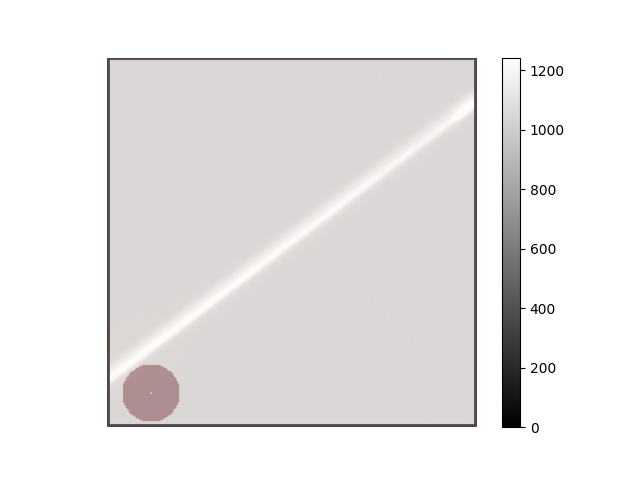

Finished


In [8]:
# This only produces several vdf images for fine tuning start and end frame. 
# There will be no 4D-Dataset saved in the nc file!

# Your input required:

start = 31 # frame number
stop = scan_size[0]*scan_size[1]+scan_size[1]+1#17010 # frame number
skip_every_n_frame = 1024
parts_per_package = 40

median_quantile = 0.97
center_list = ((232,30),) # List of aperure centers for vdf image ((x_1, y_1, (x_2,y_2), ...) 
inner_radius_list = (0,) # ist of aperure inner radiusage (radius_1, radius_2, ...)
outer_radius_list =  (20,) # List of aperure outer radius (radius_1, radius_2, ...) 


chunking = True 
chunk_size = None 


correct_dscan = True # not suitable for com data!!!
dark_correction = False

smoth = True 
sigma = 5
kernel_size = 2 # actual size = 2*size**2 +1

#At the moment not included 
#parts_per_package = 20 # only if your data is to large reduce it
#delete_dead_pixel = False # If you need it
#correct_dscan = False


# Do not change

making_4d_dataset = make_4d_dataset()
making_4d_dataset.skip_every_n_frame = skip_every_n_frame
making_4d_dataset.filepath = filepath
making_4d_dataset.filename = filename_converted
making_4d_dataset.start = start
making_4d_dataset.stop = stop
make_4d_dataset.parts_per_package = parts_per_package
making_4d_dataset.correct_dscan = correct_dscan
making_4d_dataset.center_list_com_mask = center_list
making_4d_dataset.inner_radius_list_com_mask = inner_radius_list
making_4d_dataset.outer_radius_list_com_mask = outer_radius_list
making_4d_dataset.dark_correction = dark_correction
making_4d_dataset.median_quantile = median_quantile
making_4d_dataset.parts_per_package = parts_per_package
making_4d_dataset.chunking = chunking
making_4d_dataset.chunk_size = chunk_size
making_4d_dataset.smoth_data = smoth
making_4d_dataset.kernel_sigma = sigma 
making_4d_dataset.kernel_size = kernel_size

making_4d_dataset.make_4d_data()

# Plot Data 

<IPython.core.display.Javascript object>


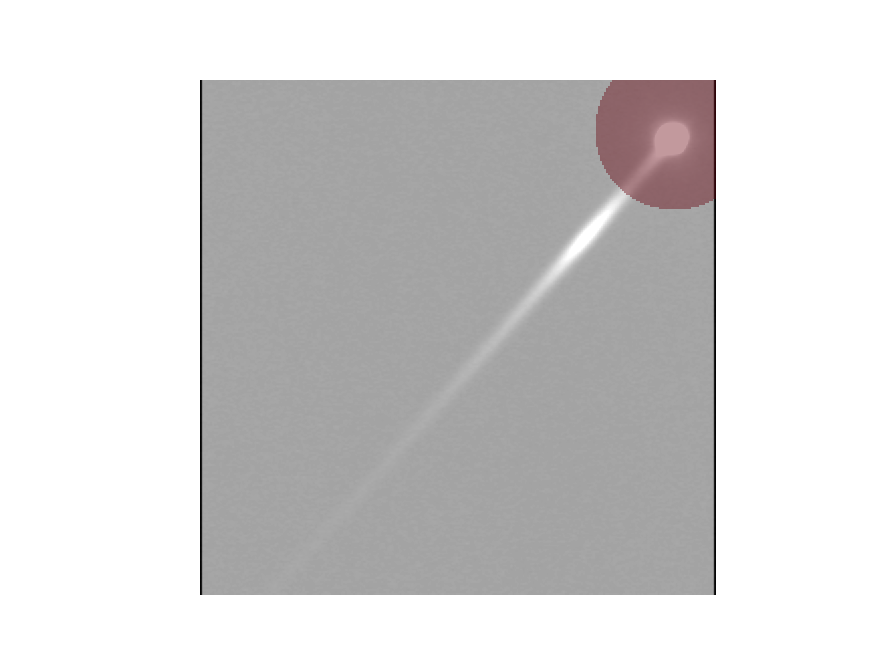

Package 1 of 3
Package 2 of 3
Package 3 of 3
Remove dead pixel


<IPython.core.display.Javascript object>


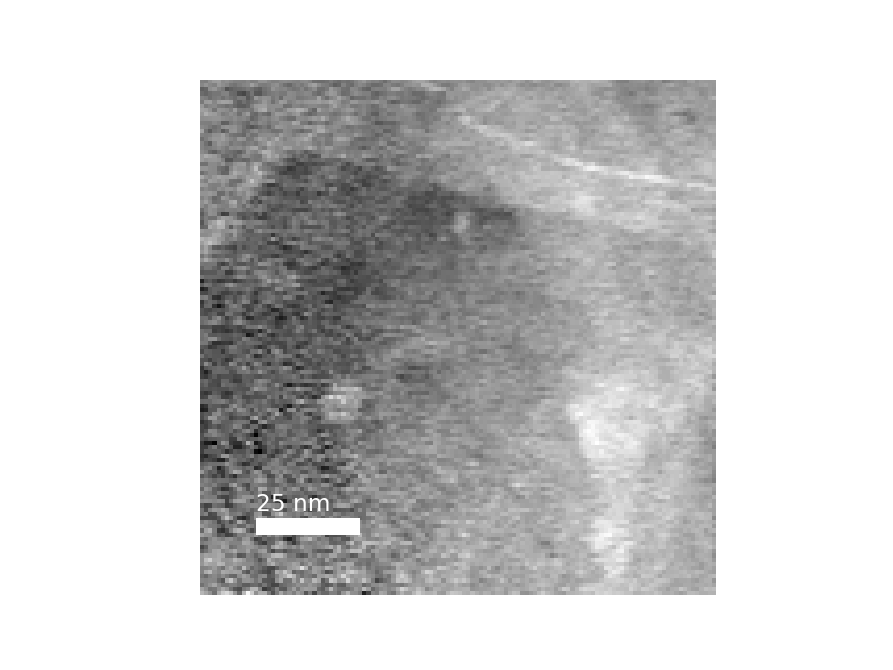

In [8]:
# Your input required:
save = False# if you want to save the image
export_as_npy = False #if you want to save a numpy file from the image
edge_pixel = 2 # how many pixel at each side of the image are cutted of 
parts_per_package = 50 # only if your data is to large reduce it
center_list = ((235,25),) # List of aperure centers for vdf image ((x_1, y_1, (x_2,y_2), ...) 
inner_radius_list =  (0,) # ist of aperure inner radiusage (radius_1, radius_2, ...)
outer_radius_list =  (40,) # List of aperure outer radius (radius_1, radius_2, ...) 
quantil = 0.995 # Clip intensity with a max value that (1-quantil)*100% of Pixels are brighter than this max vale
dpi = 600
remove_dead_pixel = True 

#nc_group = '/corrected_data/remove_dead_pixel' # without missing frames
nc_group = '/converted_data' # with missing frames


# Do not change
virtual_df = make_virtual_df()

virtual_df.save = save
virtual_df.export_as_npy = export_as_npy
virtual_df.edge_pixel = edge_pixel 
virtual_df.parts_per_package = parts_per_package
virtual_df.center_list = center_list
virtual_df.inner_radius_list = inner_radius_list
virtual_df.outer_radius_list = outer_radius_list
virtual_df.quantil = quantil 
virtual_df.nc_group = nc_group 
virtual_df.filepath = filepath
virtual_df.filename = filename_converted
virtual_df.dpi = dpi
virtual_df.remove_dead_pixel = remove_dead_pixel

virtual_df.plot_mask()
virtual_df.plot_vdf()

virtual_df.close_nc_file()

# Export dataset as block file 

In [5]:
import time
start = time.time()

# Your input required:
bin_factor = 4 # reduce image size to original_size/bin_factor

# Use only either clipping, or gamma or log for downscaling by setting only one to True

use_clipping = False 
quantil = 0.995 # Clip intensity with a max value that (1-quantil)*100% of Pixels are brighter than this max vale

use_gamma = False 
gamma = 5

use_log = True

#nc_group = '/converted_data'
nc_group = '/corrected_data/remove_dead_pixel'

skip_frames = 1

clip_data = False # don't work so far 
x_max = 115 
x_min = 8 
y_max = 125
y_min = 2 


# do not change 

block_converter = bloFileWriter(
    nc_file= filepath+'/'+filename_converted+'.nc',
    nc_group = nc_group,
    path_blo =  filepath+'/'+filename_converted+'_exported_log.blo'

)

block_converter.bin_factor = bin_factor
block_converter.use_clipping = use_clipping
block_converter.use_gamma = use_gamma
block_converter.use_log = use_log
block_converter.gamma = gamma
block_converter.quantil = quantil
block_converter.skip_frames = skip_frames
block_converter.clip_data = clip_data
block_converter.x_max = x_max 
block_converter.x_min = x_min 
block_converter.y_max = y_max
block_converter.y_min = y_min 


block_converter.run()

Make VBF
Package 1 of 12
Package 2 of 12
Package 3 of 12
Package 4 of 12
Package 5 of 12
Package 6 of 12
Package 7 of 12
Package 8 of 12
Package 9 of 12
Package 10 of 12
Package 11 of 12
Package 12 of 12
Make block file
line 1 of 120
line 2 of 120
line 3 of 120
line 4 of 120
line 5 of 120
line 6 of 120
line 7 of 120
line 8 of 120
line 9 of 120
line 10 of 120
line 11 of 120
line 12 of 120
line 13 of 120
line 14 of 120
line 15 of 120
line 16 of 120
line 17 of 120
line 18 of 120
line 19 of 120
line 20 of 120
line 21 of 120
line 22 of 120
line 23 of 120
line 24 of 120
line 25 of 120
line 26 of 120
line 27 of 120
line 28 of 120
line 29 of 120
line 30 of 120
line 31 of 120
line 32 of 120
line 33 of 120
line 34 of 120
line 35 of 120
line 36 of 120
line 37 of 120
line 38 of 120
line 39 of 120
line 40 of 120
line 41 of 120
line 42 of 120
line 43 of 120
line 44 of 120
line 45 of 120
line 46 of 120
line 47 of 120
line 48 of 120
line 49 of 120
line 50 of 120
line 51 of 120
line 52 of 120
line 53 o

OSError: 16384 requested and 0 written

# Cepstral STEM

In [11]:
cepstral_class = cepstral_stem()

cepstral_class.parts_per_package = 10
cepstral_class.nc_group = '/corrected_data/remove_dead_pixel'#'/converted_data'
cepstral_class.filepath = filepath
cepstral_class.filename = filename_converted
cepstral_class.normalise = True

cepstral_class.make_cepstral_data()

Package 1 of 10
Package 2 of 10
Package 3 of 10
Package 4 of 10
Package 5 of 10
Package 6 of 10
Package 7 of 10
Package 8 of 10
Package 9 of 10
Package 10 of 10
finish


In [5]:
import h5py 

file = h5py.File(filepath+'/'+filename_converted+'.nc', 'r')

map_matrix = file['/converted_data/map_matrix'][:]

In [9]:
map_matrix

array([[  262,   389,   516, ..., 32427, 32555, 32682],
       [  263,   390,   517, ..., 32428, 32556, 32683],
       [  264,   391,   518, ..., 32429, 32557, 32684],
       ...,
       [  386,   513,   640, ..., 32552, 32679, 32806],
       [  387,   514,   641, ..., 32553, 32680, 32807],
       [  388,   515,   642, ..., 32554, 32681, 32808]])

In [11]:
map_matrix[:,0].max()

388